<a href="https://colab.research.google.com/github/SachinthaWeerasinghe/DataScienceProject-WHO_Malnutrition_Prediction/blob/main/Model_Development_WHO_Malnutrition_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Planning and Model Development Phase**

## **Data Science Project**

**WHO Malnutrition Risk Prediction**

**Dataset : WHO Malnutrition Dataset**

**Student Number: PS/2019/259**

**Name : S.A. WEERASINGHE**

**IMPORT NECESSARY LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**MOUNT THE GOOGLE DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOAD THE DATASET**

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/DataScience/Project/DataPreprocessing/Presentation/Updated-ChildGrowthDataset-DataProcessing.csv', encoding='latin-1')

In [6]:
df1.head()

,Country,YEAR,Gender,AGE,MeanSampleSize,severe_wasting,wasting,minor_wasting,minor_overweight,overweight,obesity,stunting,underweight,severe_underweight,severe_obesity,malnutrition_risk
0,0,1.0,0,2.50,8.211890,-1.208794,-1.571385,-1.480890,-0.357104,-0.940395,-0.750373,2.131518,0.306297,-1.149921,-0.700430,1
1,0,1.0,0,0.67,8.085949,0.452015,-0.462304,-0.784776,1.915185,2.701806,3.423302,-0.086940,-0.101760,2.129947,2.466318,0
2,0,1.0,0,0.67,8.045107,-0.215541,-0.276809,-0.411388,-0.350718,-0.699917,-0.518715,-0.422598,-0.142441,-0.288911,-1.089065,0
3,0,1.0,0,1.50,8.211890,-0.999533,-1.098560,-0.849906,-1.040642,-1.420058,-1.298059,1.728110,0.210355,-1.196219,-0.728349,0
4,0,1.0,0,2.50,8.211890,-1.434082,-1.814842,-1.800875,-0.097032,-1.369389,-1.751036,2.518466,0.931110,-1.532947,-0.243798,0


In [7]:
df1.shape

(55436, 16)

# **MODEL DEVELOPMENT - NEURAL NETWORK**

**INSTALL REQUIRED LIBRARIES**

In [8]:
pip install tensorflow scikit-learn pandas numpy


**IMPORT NECESSARY LIBRARIES**

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**SPLIT THE DATASET INTO TRAINING AND TESTING DATASET**

In [11]:
X = df1.drop('malnutrition_risk', axis=1)
y = df1['malnutrition_risk']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**NORMALIZE THE DATA**

In [12]:
# Standardize the feature data (make sure to fit only on training data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**BUILD THE NEURAL NETWORK MODEL**

In [13]:
# Define the neural network model
model = Sequential()

# Input layer and first hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**COMPILE THE MODEL**

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**TRAIN THE MODEL**

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7128 - loss: 0.5311 - val_accuracy: 0.9092 - val_loss: 0.2480
Epoch 2/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9132 - loss: 0.2326 - val_accuracy: 0.9158 - val_loss: 0.2214
Epoch 3/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9184 - loss: 0.2174 - val_accuracy: 0.9202 - val_loss: 0.2118
Epoch 4/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9175 - loss: 0.2131 - val_accuracy: 0.9191 - val_loss: 0.2072
Epoch 5/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9214 - loss: 0.2025 - val_accuracy: 0.9222 - val_loss: 0.2036
Epoch 6/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.1998 - val_accuracy: 0.9221 - val_loss: 0.2024
Epoch 7/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9222 - loss: 0.2020 - val_accuracy: 0.9222 - val_loss: 0.2021
Epoch 8/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9264 - loss: 0.1964 - 

**EVALUATE THE MODEL**

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.1838
Test accuracy: 0.9288


**PREDICTION AND METRICS**

In [17]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

# Accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')


347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5497
           1       0.91      0.96      0.93      5591

    accuracy                           0.93     11088
   macro avg       0.93      0.93      0.93     11088
weighted avg       0.93      0.93      0.93     11088

Accuracy: 0.9288


**PLOT THE HISTORY**

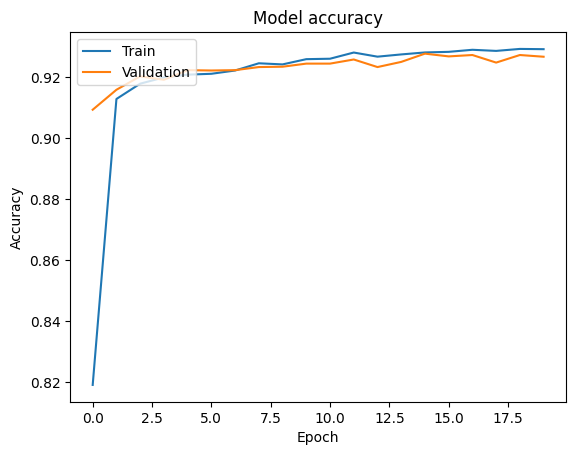

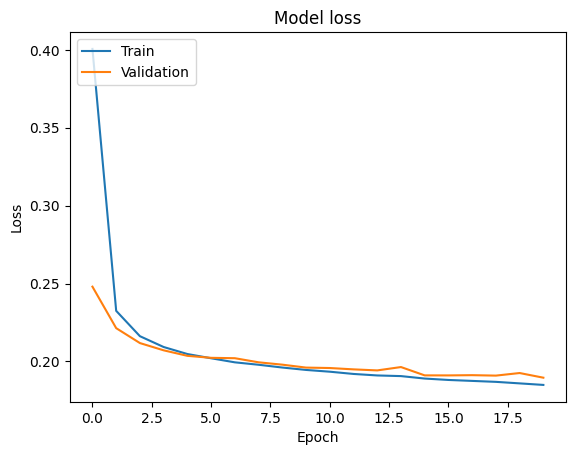

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
